#### Import libraries

In [68]:
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
%matplotlib inline

Data import

In [2]:
data_dir = '../dades/'
rescue_actions = pd.read_csv(data_dir+'Actuacions_en_salvaments_al_medi_natural_dels_Bombers_de_la_Generalitat_20231109.csv')

Exploration

In [3]:
rescue_actions.head()

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
0,232539916,Metropolitana Nord,SV,salvaments,MU,Salvament i/o rescat de muntanya,8261,Santa Susanna,Santa Susanna,21,...,2023,10,08/10/2023,474668.0,4610652.0,25,N,2.695798,41.647208,POINT (2.695797715126 41.647207730681)
1,230315085,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25043,"Vall de Boí, La","Vall de Boí, La",5,...,2023,10,08/10/2023,324638.0,4719040.0,3,N,0.862264,42.603854,POINT (0.862264040642 42.603853695832)
2,232315301,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,8175,Puig-reig,Cal Riera,14,...,2023,10,08/10/2023,407110.0,4642434.0,23,N,1.879642,41.928405,POINT (1.879641578211 41.92840451498)
3,230229809,Girona,SV,salvaments,MU,Salvament i/o rescat de muntanya,17095,Lloret de Mar,Lloret de Mar,34,...,2023,10,08/10/2023,487480.0,4620337.0,2,N,2.849448,41.734746,POINT (2.849448083699 41.734745914847)
4,230229850,Girona,SV,salvaments,RA,Acompanyament de persones perdudes,17185,Sant Joan les Fonts,Sant Joan les Fonts,19,...,2023,10,08/10/2023,463030.0,4673271.0,2,N,2.552117,42.210731,POINT (2.55211709702 42.210731354776)


What columns does the dataframe have?

In [4]:
rescue_actions.columns

Index(['ACT_NUM_ACTUACIO', 'NOM REGIO', 'TAL_COD_ALARMA1', 'TGA_NOM_GRUPO',
       'TAL_COD_ALARMA2', 'TAL_NOM_ALARMA', 'CODI_INE', 'MUNICIPI',
       'NOM_POBLACIO', 'CODI_COMARCA', 'NOM_COMARCA', 'ANY', 'MES',
       'ACT_DAT_ACTUACIO', 'ACT_X_UTM', 'ACT_Y_UTM', 'CODI_REGIO', 'VALIDAT',
       'LONGITUD', 'LATITUD', 'GEOREFERÈNCIA'],
      dtype='object')

We will only study the time window between 2018-2022

In [5]:
rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)]

,ACT_NUM_ACTUACIO,NOM REGIO,TAL_COD_ALARMA1,TGA_NOM_GRUPO,TAL_COD_ALARMA2,TAL_NOM_ALARMA,CODI_INE,MUNICIPI,NOM_POBLACIO,CODI_COMARCA,...,ANY,MES,ACT_DAT_ACTUACIO,ACT_X_UTM,ACT_Y_UTM,CODI_REGIO,VALIDAT,LONGITUD,LATITUD,GEOREFERÈNCIA
1794,220317846,Lleida,SV,salvaments,MU,Salvament i/o rescat de muntanya,25089,Farrera,Montesclado,26,...,2022,12,31/12/2022,359029.0,4703443.0,3,S,1.285146,42.470508,POINT (1.285146163115 42.47050799814)
1795,220424995,Tarragona,SV,salvaments,MU,Salvament i/o rescat de muntanya,43049,Cornudella de Montsant,Siurana,29,...,2022,12,31/12/2022,326877.0,4569430.0,4,S,0.933488,41.257753,POINT (0.933487648042 41.257752634189)
1796,222433564,Metropolitana Sud,SV,salvaments,MU,Salvament i/o rescat de muntanya,8270,Sitges,Sitges,17,...,2022,12,31/12/2022,396692.0,4564042.0,24,S,1.767511,41.221172,POINT (1.767511104528 41.221172153671)
1797,222703229,U.F. Val d'Aran,SV,salvaments,MU,Salvament i/o rescat de muntanya,25025,Naut Aran,Naut Aran,39,...,2022,12,31/12/2022,335546.0,4726173.0,27,S,0.993092,42.670455,POINT (0.993092440136 42.670455109079)
1798,222318655,Centre,SV,salvaments,MU,Salvament i/o rescat de muntanya,17006,Alp,Alp,15,...,2022,12,31/12/2022,409042.0,4687406.0,23,S,1.895928,42.333593,POINT (1.895928288604 42.333593201755)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,182600035,Terres de l'Ebre,SV,salvaments,MU,Rescat de muntanya,43136,Sant Carles de la Ràpita,Sant Carles de la Ràpita,22,...,2018,1,02/01/2018,292357.0,4500888.0,26,SI,0.544737,40.632747,NaN
10233,182500044,Metropolitana Nord,SV,salvaments,MR,Recerca i/o rescat en medi marítim,8121,Mataró,Mataró,21,...,2018,1,01/01/2018,454218.0,4597542.0,25,SI,2.451231,41.528215,NaN
10234,180200036,Girona,SV,salvaments,MU,Rescat de muntanya,17032,Cadaqués,Cadaqués,2,...,2018,1,01/01/2018,524808.0,4684559.0,2,SI,3.301029,42.312873,NaN
10235,182500054,Metropolitana Nord,SV,salvaments,RC,Recerca persones perdudes,8120,Matadepera,Matadepera,40,...,2018,1,01/01/2018,418314.0,4610776.0,25,SI,2.019110,41.644542,NaN


Make a copy of filtered by year results

In [6]:
filt_rescues = rescue_actions[(rescue_actions["ANY"] >= 2018) & (rescue_actions["ANY"]<= 2022)].copy(deep = True)

Is there a standard numenclature for the type of rescue type?

In [7]:
filt_rescues["TAL_NOM_ALARMA"].unique()

array(['Salvament i/o rescat de muntanya',
       'Salvament i/o recerca i/o rescat en medi fluvial (rius,barrancs, llacs)',
       'Recerca persones perdudes o desaparegudes',
       'Salvament i/o recerca i/o rescat en medi marítim',
       'Salvament i/o rescat en coves i pous', 'Rescat de muntanya',
       'Recerca persones perdudes', 'Recerca i/o rescat en medi marítim',
       'Recerca i/o rescat en medi fluvial (rius, barrancs, llacs)',
       'Rescat en coves i pous'], dtype=object)

What data type is used for the dates?

In [8]:
type(filt_rescues.iloc[0]["ACT_DAT_ACTUACIO"])

str

Are county names unique (standarized names?)

In [9]:
filt_rescues["NOM_COMARCA"].unique()

array(['Pallars Sobirà', 'Priorat', 'Garraf', "Val d'Aran", 'Cerdanya',
       'Alt Penedès', 'Bages', 'Baix Camp', 'Baix Llobregat', 'Gironès',
       'Garrotxa', 'Segrià', 'Ripollès', 'Alt Camp', 'Alt Urgell',
       'Maresme', 'Vallès Oriental', 'Pallars Jussà', 'Baix Ebre',
       'Osona', 'Vallès Occidental', 'Conca de Barberà', 'Alt Empordà',
       'Barcelonès', 'Solsonès', "Pla de l'Estany", 'Baix Empordà',
       "Ribera d'Ebre", 'Tarragonès', 'Alta Ribagorça', 'Terra Alta',
       'Berguedà', 'Anoia', 'Selva', 'Moianès', 'Noguera', 'Montsià',
       'Baix Penedès', 'Fora de Catalunya', 'Urgell', "Pla d'Urgell",
       'Garrigues', 'Segarra'], dtype=object)

How many rescue actions by county in 2018-2022 period?

In [49]:
rescue_tot_comarca = filt_rescues[["CODI_COMARCA", "NOM_COMARCA","ACT_NUM_ACTUACIO"]].groupby(["CODI_COMARCA", "NOM_COMARCA"]).count().copy(deep = True).reset_index()
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
0,0,Fora de Catalunya,8
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192


In [50]:
#We are only interested in rescue actions in Catalonia, se we need to pop 'Fora de Catalunya'
rescue_tot_comarca.drop(0, inplace =  True)

In [51]:
rescue_tot_comarca.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO
1,1,Alt Camp,80
2,2,Alt Empordà,398
3,3,Alt Penedès,120
4,4,Alt Urgell,192
5,5,Alta Ribagorça,196


In [61]:
cat = gpd.read_file(data_dir + "divisions-administratives-v2r1-comarques-100000-20220801.shx")
cat.rename(columns = {'NOMCOMAR':'NOM_COMARCA'}, inplace = True)
cat.head()

,CODICOMAR,NOM_COMARCA,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


In [76]:
merged_rescue_tot = rescue_tot_comarca.merge(cat, how='left', on='NOM_COMARCA')
# merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry", crs="EPSG:4326")
merged_rescue_tot_gpd = gpd.GeoDataFrame(merged_rescue_tot, geometry="geometry")
merged_rescue_tot.head()

,CODI_COMARCA,NOM_COMARCA,ACT_NUM_ACTUACIO,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,1,Alt Camp,80,01,Valls,537.6317,"POLYGON ((373635.755 4592021.079, 373669.333 4..."
1,2,Alt Empordà,398,02,Figueres,1356.6431,"MULTIPOLYGON (((514495.140 4662167.740, 514492..."
2,3,Alt Penedès,120,03,Vilafranca del Penedès,592.5498,"POLYGON ((385914.163 4595999.962, 386085.364 4..."
3,4,Alt Urgell,192,04,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360736.000 4649167.000, 360624..."
4,5,Alta Ribagorça,196,05,el Pont de Suert,427.2234,"POLYGON ((326572.730 4721574.001, 326622.339 4..."


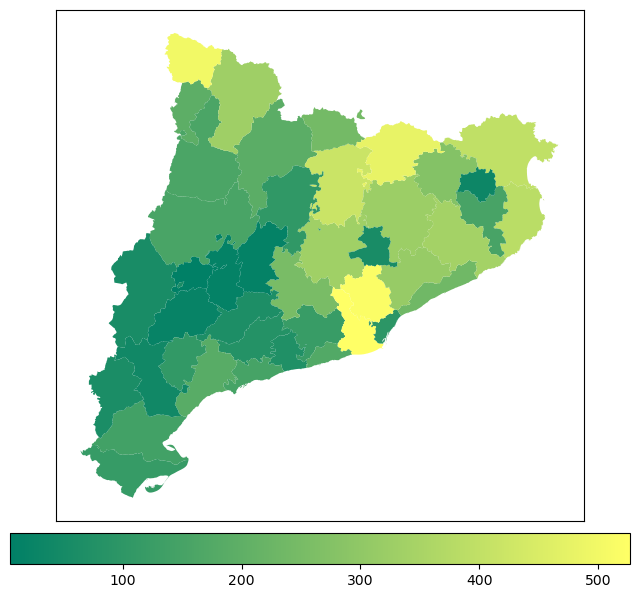

In [80]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.set_xticks([])
ax.set_yticks([])
merged_rescue_tot_gpd.plot(column = 'ACT_NUM_ACTUACIO',
                                  ax=ax,
                                  cmap='summer',
                                  legend=True,
                                  legend_kwds={'orientation': "horizontal", 'pad': 0.02})
plt.savefig('figures/total_num_2018_2022.pdf')
plt.show()